# Check CUES output from annotated hate speech corpora

In [13]:
# Merge cues output with hate speech labels
import pandas as pd
import os

netmapper_output_dirpath = '/storage2/mamille3/data/hate_speech/gab_hate_corpus/netmapper_output/'
cues = pd.read_csv(os.path.join(netmapper_output_dirpath, 'ghc_text.csv.cues.tsv'), sep='\t', on_bad_lines='skip')
# Unique ID is meaningless here--a mistake
cues

,Unique ID,Author,Date,concept count,# thesaurus replacements,reading difficulty,named entity,abusive,exclusive,poweranger,...,# distract,# sad,# fear,# anger,# happy,# disgust,# surprise,# anticipation,# trust,# lonely
0,0,NaN,NaN,4.0,4.0,0.151515,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,18.0,16.0,0.058333,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,7.0,5.0,0.055556,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,64.0,49.0,0.050575,NaN,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,4,NaN,NaN,12.0,8.0,0.133333,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,5505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27542,5506,NaN,NaN,20.0,16.0,0.028369,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27543,5507,NaN,NaN,29.0,20.0,0.064935,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27544,5508,NaN,NaN,27.0,27.0,0.041667,2.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Merge in hate column
gabhate_dirpath = '/storage2/mamille3/data/hate_speech/gab_hate_corpus/'
train = pd.read_csv(os.path.join(gabhate_dirpath, 'ghc_train.tsv'), sep='\t')
test = pd.read_csv(os.path.join(gabhate_dirpath, 'ghc_test.tsv'), sep='\t')
ghc = pd.concat([train, test], ignore_index=True)
ghc['hate'] = ghc.hd | ghc.cv | ghc.vo
ghc

,text,hd,cv,vo,hate
0,He most likely converted to islam due to his n...,0,0,0,0
1,So Ford lied about being a psychologist. Recor...,0,0,0,0
2,Jobs. Education. Ending abuse of Nation. CA43.,0,0,0,0
3,"I share a lot of your values, & like many who ...",0,0,0,0
4,I am so ready to get back to blogging! www.ben...,0,0,0,0
...,...,...,...,...,...
27541,"Trump To ""Counter"" DNC Lawsuit; Seeks Servers,...",0,0,0,0
27542,i guess eu is gonna have to back track a littl...,0,0,0,0
27543,A good read here.... https://countrysquire....,0,0,0,0
27544,The only way to change things is to have compa...,0,0,0,0


In [16]:
cues['hate'] = ghc['hate']
cues

,Unique ID,Author,Date,concept count,# thesaurus replacements,reading difficulty,named entity,abusive,exclusive,poweranger,...,# sad,# fear,# anger,# happy,# disgust,# surprise,# anticipation,# trust,# lonely,hate
0,0,NaN,NaN,4.0,4.0,0.151515,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,NaN,NaN,18.0,16.0,0.058333,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,NaN,NaN,7.0,5.0,0.055556,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,NaN,NaN,64.0,49.0,0.050575,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0
4,4,NaN,NaN,12.0,8.0,0.133333,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,5505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
27542,5506,NaN,NaN,20.0,16.0,0.028369,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
27543,5507,NaN,NaN,29.0,20.0,0.064935,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
27544,5508,NaN,NaN,27.0,27.0,0.041667,2.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Visualize CUES for hate vs non-hate

In [24]:
selected_cue_cols = ['concept count', 'abusive', 'exclusive', 'poweranger', 'powerencourage',
       'powerfear', 'powerforbidden', 'powergreed', 'powerlust', 'powersafety',
       'absolutist', 'equivocal', 'connective', 'positive', 'negative',
       '1st person', '2nd person', '3rd person', 'pronoun#', 'numbers',
       'expletive', '# all caps', '# sentences',
       '# exclamation points', '# question marks',
       'is in all caps', '# happy emoticons', '# sad emoticons',
       '# angry emoticons', '# embarrased emoticons', '# symbol concepts',
       '# identities', '# family', '# political', '# gender', '# religion',
       '# race/nationality', '# other', 'avg sentence length', 'avg word length']
if 'postive' in cues.columns:
    cues.rename(columns={'postive': 'positive'}, inplace=True)
hate = cues.loc[cues['hate']==1, selected_cue_cols]
nonhate = cues.loc[cues['hate']==0, selected_cue_cols]
hate_avgs = hate.mean()
print(hate_avgs)
nonhate_avgs = nonhate.mean()
print()
print(nonhate_avgs)

concept count             24.792646
abusive                    1.347858
exclusive                  1.123260
poweranger                 1.181452
powerencourage             1.061856
powerfear                  1.210306
powerforbidden             1.050279
powergreed                 1.022222
powerlust                  1.196897
powersafety                1.087649
absolutist                 1.064140
equivocal                  1.066489
connective                 1.634938
positive                   5.434446
negative                   3.831769
1st person                 1.347150
2nd person                 1.387228
3rd person                 1.634445
pronoun#                   2.217178
numbers                    1.422131
expletive                  1.581818
# all caps                 3.214742
# sentences                2.063885
# exclamation points       2.188976
# question marks                NaN
is in all caps             1.000000
# happy emoticons          1.000000
# sad emoticons             

In [47]:
# avgs = pd.concat([hate_avgs, nonhate_avgs], axis=0, keys=['hate', 'nonhate'], names=['dataset'])
avgs = pd.concat([hate_avgs, nonhate_avgs], axis=0, keys=['hate', 'nonhate'], names=['dataset']).reset_index(level='dataset').reset_index(level=0)
avgs.columns = ['feature', 'dataset', 'mean_value']
# avgs = pd.concat([hate_avgs, nonhate_avgs], axis=1)
# avgs.columns = ['hate', 'nonhate']
avgs

,feature,dataset,mean_value
0,concept count,hate,24.792646
1,abusive,hate,1.347858
2,exclusive,hate,1.123260
3,poweranger,hate,1.181452
4,powerencourage,hate,1.061856
...,...,...,...
75,# religion,nonhate,1.078704
76,# race/nationality,nonhate,1.099211
77,# other,nonhate,1.381887
78,avg sentence length,nonhate,14.552615


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'concept count'),
  Text(1, 0, 'abusive'),
  Text(2, 0, 'exclusive'),
  Text(3, 0, 'poweranger'),
  Text(4, 0, 'powerencourage'),
  Text(5, 0, 'powerfear'),
  Text(6, 0, 'powerforbidden'),
  Text(7, 0, 'powergreed'),
  Text(8, 0, 'powerlust'),
  Text(9, 0, 'powersafety'),
  Text(10, 0, 'absolutist'),
  Text(11, 0, 'equivocal'),
  Text(12, 0, 'connective'),
  Text(13, 0, 'positive'),
  Text(14, 0, 'negative'),
  Text(15, 0, '1st person'),
  Text(16, 0, '2nd person'),
  Text(17, 0, '3rd person'),
  Text(18, 0, 'pronoun#'),
  Text(19, 0, 'numbers'),
  Text(20, 0, 'expletive'),
  Text(21, 0, '# all caps'),
  Text(22, 0, '# sentences'),
  Text(23, 0, '# exclamation points'),
  Text(24, 0, '# question marks'),
  Text(25, 0, 'is in all caps'),
  Text(26, 0, '# happy emoticons'),
  Text(27, 0, '# s

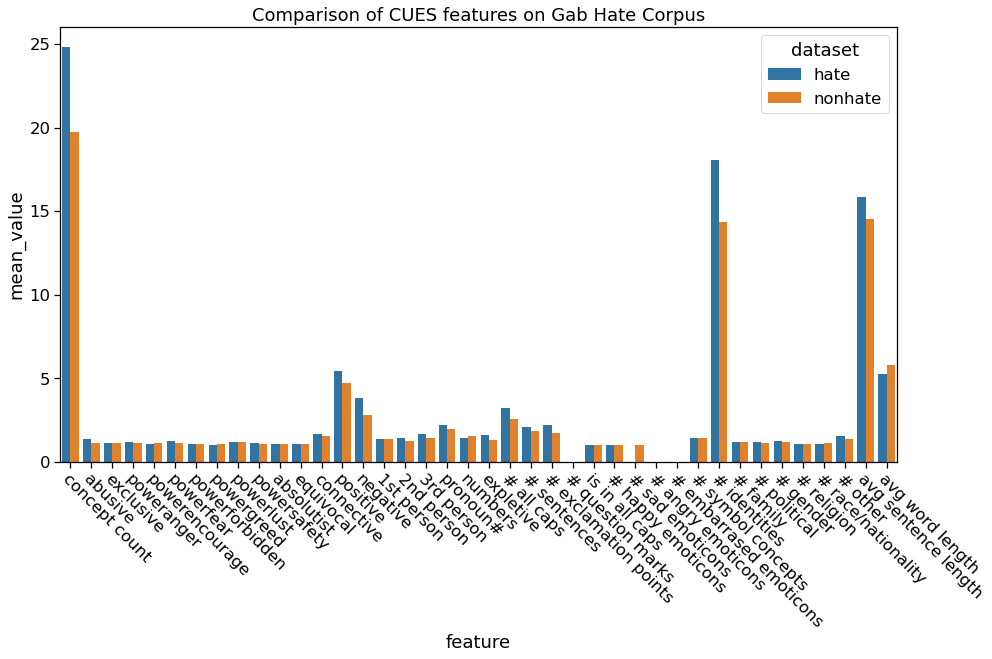

In [58]:
# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

# data = cues[selected_cue_cols + ['hate']]
# sns.barplot(x=data.columns, y=data.index, hue=data.hate, data=cues[selected_cue_cols])

sns.set_context('notebook', font_scale=1.5)
plt.figure(figsize=(15,8))
sns.barplot(x='feature', y='mean_value', hue='dataset', data=avgs)
plt.title("Comparison of CUES features on Gab Hate Corpus")
plt.xticks(rotation=-45, ha='left', rotation_mode='anchor')

# Check CUES output on covid data

## Load covid data

In [1]:
import pandas as pd
import os
import dateutil.parser as dparser
from datetime import datetime
from tqdm.notebook import tqdm
import pdb

covid_dirpath = '/storage2/mamille3/data/covid/'
# begin_date = datetime(2020,2,1)
# end_date = datetime(2020,7,1)


selected_cue_cols = ['concept count', 'abusive', 'exclusive', 'poweranger', 'powerencourage',
       'powerfear', 'powerforbidden', 'powergreed', 'powerlust', 'powersafety',
       'absolutist', 'equivocal', 'connective', 'positive', 'negative',
       '1st person', '2nd person', '3rd person', 'pronoun#', 'numbers',
       'expletive', '# all caps', '# sentences',
       '# exclamation points', '# question marks',
       'is in all caps', '# happy emoticons', '# sad emoticons',
       '# angry emoticons', '# embarrased emoticons', '# symbol concepts',
       '# identities', '# family', '# political', '# gender', '# religion',
       '# race/nationality', '# other', 'avg sentence length', 'avg word length']

netmapper_output = []
for dirname in tqdm(os.listdir(covid_dirpath)[:1]):
    print(dirname)
    for fname in os.listdir(os.path.join(covid_dirpath, dirname)):
        if 'cues' in fname:
            print(fname)
            fpath = os.path.join(covid_dirpath, dirname, fname)
            # netmapper_output[os.path.splitext(fname)[0].split('.')[1]] = pd.read_csv(fpath, sep='\t', on_bad_lines='skip')
            cues = pd.read_csv(fpath, sep='\t', on_bad_lines='skip')
            # print(cues.columns)
            if 'postive' in cues.columns:
                cues.rename(columns={'postive': 'positive'}, inplace=True)
            selected = cues[selected_cue_cols]
            avgs = selected.mean()
            cues['date'] = dparser.parse(dirname, fuzzy=True)
            netmapper_output.append(cues)

len(netmapper_output)

  0%|          | 0/1 [00:00<?, ?it/s]

covid_20200602
tmplo0ogw_1.cues.tsv


1

In [ ]:
# Combine into one df
cues_overtime = pd.concat(netmapper_output)

In [1]:
import os

gab_dirpath = '/storage3/Gab'

# Chat logs
# with open(os.path.join(gab_dirpath, 'chatlogs.txt')) as f:
#     chat_lines = f.read().splitlines()

In [13]:
from sqlalchemy import create_engine
import pandas as pd 

engine = create_engine('postgresql://test:@localhost', pool_recycle=3600)


with engine.connect() as conn, conn.begin():
    data = pd.read_sql_table("data", conn)

OperationalError: (psycopg2.OperationalError) could not connect to server: Connection refused
	Is the server running on host "localhost" (::1) and accepting
	TCP/IP connections on port 5432?
could not connect to server: Connection refused
	Is the server running on host "localhost" (127.0.0.1) and accepting
	TCP/IP connections on port 5432?

(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [15]:
import pandas as pd
import os

parler_dirpath = '/storage3/Parler/'

data = pd.read_csv(os.path.join(parler_dirpath, 'parler_data_from_2020-01-06.csv'))
data

,Unnamed: 0,id,author_user_name,author_name,timestamp,echoed_by_author,echoed_by_author_user_name,when_echoed,impressions_count,text,hashtags,mentions,external_urls,internal_image_urls,internal_media_urls,internal_video_hash,comments_count,echoes_count,upvotes_count,echo_comment
0,0,d5cbc10f258b4763873f982dfe6a558e,@TD78,TD78,4 days ago,NaN,NaN,NaN,250,Four years sober from alcohol Mary Jane helped,[],[],['https://www.forbes.com/sites/ajherrington/20...,[],[],[],0.0,0.0,2.0,NaN
1,1,ae59c03012f94fb7913c3b46fcaa01a3,@Joemachesky,🇺🇸🇺🇸Proud Navy Veteran🇺🇸🇺🇸,4 days ago,Vociferous Bob,@BobbyVociferous,4 days ago,3818,Here’s that piece of shit Communist traitor Ke...,[],[],['https://www.ajc.com/politics/kemp-condemns-p...,[],[],[],12.0,45.0,62.0,Kemp needs to be wiped off the face of the ear...
2,2,3ace7f35ec264edaae1066214dcc5308,@CounterGlobalist,Counter Globalist News,3 days ago,Chuck Henderson,@DeepWheat,3 days ago,1496,'*' MUST SEE: '*'Corrupt Hunter Biden Whines t...,[],[],['https://counterglobalist.news/exclusive-corr...,[],[],[],0.0,13.0,14.0,NaN
3,3,c7a954b5201d40d6ba07cf1de68ebafa,@jakeroedel,The United States is a Dictatorship,3 days ago,Wilbur M.,@WilburC,3 days ago,1378,Look what they've done! They murdered an unarm...,[],[],[],['https://api.parler.com/l/77JxF'],[],[],12.0,27.0,26.0,"This was unjustified,Murder!"
4,4,89eeb62c1f814e6d9c706caccdd059cc,@BeachMilk,BeachMilk,4 days ago,GG,@GCGI,4 days ago,11602,ANTIFA weapons being staged over DC march-area...,[],[],[],[],['https://video.parler.com/g4/KO/g4KOVJ8rGWPm_...,['g4KOVJ8rGWPm_small'],27.0,93.0,89.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747379,1747379,3528ff7545d046c2a78aaae5b2995458,@RealMarjorieGreene,Marjorie Taylor Greene,4 days ago,Boopliberty,@Boopliberty,4 days ago,496890,NaN,[],[],[],['https://api.parler.com/l/9KDYH'],[],[],1709.0,3283.0,10784.0,NaN
1747380,1747380,12b16d4f97b0495798d08369f8dbab57,@IamfromQ,Q,4 days ago,FearlessFreep,@FearlessFreep3,4 days ago,4283,🔊WOW! We hear you from the West Wing—THANK YOU...,[],[],[],[],['https://video.parler.com/AX/XJ/AXXJEHe0zXFl....,['AXXJEHe0zXFl'],8.0,39.0,89.0,NaN
1747381,1747381,bb27d96321954228929a7d6a6414a3e9,@NationalGunRights,National Association for Gun Rights,5 days ago,Rickvick,@Rickvickpudak,5 days ago,964034,"The United Nations' “Small Arms Treaty"" has be...",[],[],['https://nagr.org/2020/1218_RandUN-p.aspx?pid...,[],[],[],807.0,3857.0,8293.0,NaN
1747382,1747382,1b956a3e21b04f25913aafd65a1999cd,@BreitbartNews,Breitbart News,5 days ago,Myzer1,@Myzer1171388011499,4 days ago,438739,“No Kenosha law enforcement officer in this ca...,[],[],['https://www.breitbart.com/law-and-order/2021...,[],[],[],338.0,429.0,3577.0,👍👍


In [16]:
data.columns

Index(['Unnamed: 0', 'id', 'author_user_name', 'author_name', 'timestamp',
       'echoed_by_author', 'echoed_by_author_user_name', 'when_echoed',
       'impressions_count', 'text', 'hashtags', 'mentions', 'external_urls',
       'internal_image_urls', 'internal_media_urls', 'internal_video_hash',
       'comments_count', 'echoes_count', 'upvotes_count', 'echo_comment'],
      dtype='object')

In [18]:
data.timestamp.value_counts()

4 days ago       1115102
5 days ago        326093
3 days ago        196567
1 week ago         34005
6 days ago         22197
1 month ago        20634
2 weeks ago        11505
3 weeks ago         9469
2 months ago        4715
4 weeks ago         1754
5 months ago        1507
3 months ago        1262
4 months ago        1177
6 months ago         654
1 year ago           311
2 years ago          251
7 months ago         115
8 months ago          28
11 months ago         22
9 months ago           9
10 months ago          7
Name: timestamp, dtype: int64